### This file runs the RBC Model where the productivity shock follows a markov process.

In [1]:
Pkg.dir("Dolo")
import Dolo
using AxisArrays
filename=("https://raw.githubusercontent.com/EconForge/dolo_models/master/RBCS/rbc_mc.yaml")

. To use SymEngine call Pkg.add("SymEngine")


"https://raw.githubusercontent.com/EconForge/dolo_models/master/RBCS/rbc_mc.yaml"

In [2]:
# convert the YAML file into a Dolo model
model=Dolo.yaml_import(filename)

Model 


MethodError: MethodError: no method matching sanitize(::Expr, ::Dolo.Model{Symbol("##336")})[0m
Closest candidates are:
  sanitize(::Expr, [1m[31m::Array{Symbol,1}[0m) at C:\Users\Angela\AppData\Local\JuliaPro-0.5.1.1\pkgs-0.5.1.1\v0.5\Dolo\src\printing.jl:14
  sanitize(::Any, [1m[31m::Array{Symbol,1}[0m) at C:\Users\Angela\AppData\Local\JuliaPro-0.5.1.1\pkgs-0.5.1.1\v0.5\Dolo\src\printing.jl:3
  sanitize(::Any, [1m[31m::Dolo.SModel{ID}[0m) at C:\Users\Angela\AppData\Local\JuliaPro-0.5.1.1\pkgs-0.5.1.1\v0.5\Dolo\src\printing.jl:32[0m

In [3]:
# look up some characteristics of the model e.g. markov chain transition matrix
print(model.exogenous.transitions)

[0.9 0.1; 0.1 0.9]

In [27]:
# simulate the Markov Chain (exogenous process) for N simulations each with T periods
N=50 # number of simulations
T=1000 # time period

# simulation (essentially just drawing N*T realizations of the random variable)
sim_mc=Dolo.simulate(model.exogenous,N,T,1) # 1 is the initial point

2-dimensional AxisArray{Int64,2,...} with axes:
    :T, 1:1000
    :N, 1:50
And data, a 1000×50 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  2  1  1  2  1  1  1     1  1  1  1  1  1  1  2  1  1  1  1
 2  1  2  1  1  1  2  1  1  2  1  1  1     2  1  1  1  1  1  1  2  1  1  1  1
 1  2  1  1  1  1  2  1  1  2  1  2  1     1  1  1  1  1  2  1  2  1  1  1  1
 1  2  1  1  2  1  2  2  1  2  1  2  1  …  1  1  1  1  1  1  1  2  2  1  1  1
 1  1  1  1  2  1  2  2  1  2  1  2  1     1  2  1  1  2  1  1  1  2  1  2  1
 1  1  1  1  2  1  2  2  1  2  1  2  1     1  2  1  1  2  1  1  1  2  1  2  1
 1  1  1  2  2  1  2  2  1  2  1  2  2     1  2  1  1  2  1  1  1  2  1  2  1
 1  1  1  2  2  1  2  2  2  2  1  2  2     1  2  1  1  2  1  1  1  2  2  2  2
 1  1  1  1  2  1  2  2  2  2  1  1  2  …  1  2  1  1  2  2  1  1  2  2  2  2
 1  1  1  2  2  1  2  2  1  2 

Use time iteration to solve the model.

In [5]:
@time dr = Dolo.time_iteration(model, maxit=100, verbose=false, details=false)
@time res = Dolo.time_iteration(model, dr; maxit=100, details=true)

  8.839151 seconds (10.01 M allocations: 581.803 MB, 2.16% gc time)
It    SA          gain        nit  
-----------------------------------
0     2.57e-05    NaN         0    
1     1.72e-05    6.69e-01    1    
2     1.58e-05    9.21e-01    1    
3     1.46e-05    9.21e-01    1    
4     1.34e-05    9.21e-01    1    
5     1.23e-05    9.21e-01    1    
6     1.14e-05    9.21e-01    1    
7     1.05e-05    9.21e-01    1    
8     9.63e-06    9.20e-01    1    
9     8.87e-06    9.20e-01    1    
10    8.16e-06    9.20e-01    1    
11    7.51e-06    9.20e-01    1    
12    6.91e-06    9.20e-01    1    
13    6.35e-06    9.20e-01    1    
14    5.84e-06    9.20e-01    1    
15    5.37e-06    9.20e-01    1    
16    4.94e-06    9.19e-01    1    
17    4.54e-06    9.19e-01    1    
18    4.17e-06    9.19e-01    1    
19    3.84e-06    9.19e-01    1    
20    3.53e-06    9.19e-01    1    
21    3.24e-06    9.19e-01    1    
22    2.98e-06    9.19e-01    1    
23    2.73e-06    9.18e-01    1 

Results of Time Iteration Algorithm
 * Complementarities: true
 * Decision Rule type: Dolo.TimeIterationResult
 * Number of iterations: 40
 * Convergence: true
   * |x - x'| < 1.0e-08: true


In [10]:
# use Dolo tabulate -- for all the values of k, looks up what labour, investment,
# and consumption are
df_gdp = Dolo.tabulate(model, dr, :k) 

2-dimensional AxisArray{Float64,2,...} with axes:
    :V, Symbol[:mc_process,:k,:n,:i]
    :k, [1.871,2.04109,2.21118,2.38127,2.55136,2.72145,2.89154,3.06163,3.23172,3.40181  …  17.1791,17.3492,17.5193,17.6894,17.8595,18.0296,18.1997,18.3698,18.5399,18.71]
And data, a 4×100 Array{Float64,2}:
 1.0       1.0       1.0       1.0       …   1.0        1.0       1.0     
 1.871     2.04109   2.21118   2.38127      18.3698    18.5399   18.71    
 0.623249  0.60528   0.587993  0.571966      0.240375   0.2393    0.238234
 0.303231  0.303403  0.303002  0.301665      0.13253    0.13102   0.129513

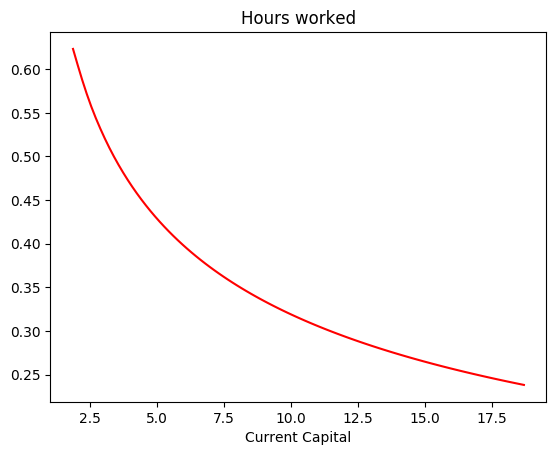

In [19]:
import PyPlot;
plt=PyPlot
fig = plt.figure("Labour")

plt.plot(df_gdp[:k], df_gdp[Axis{:V}(:n)], color="red", label="Hours worked")
plt.xlabel("Current Capital");
plt.title("Hours worked");

Let's look at what the investment decision is.

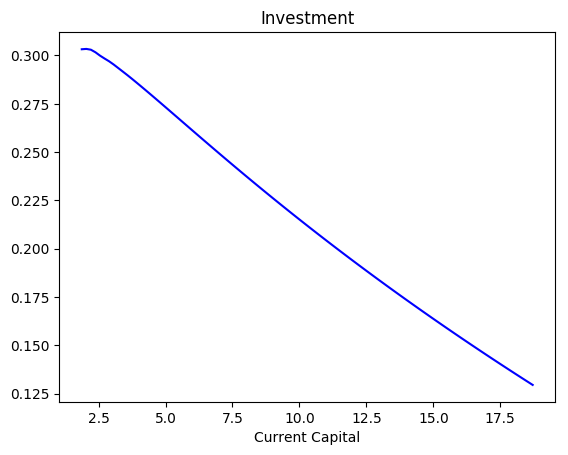

In [20]:
fig = plt.figure("Investment")

plt.plot(df_gdp[:k], df_gdp[Axis{:V}(:i)], color="blue", label="Investment")
plt.xlabel("Current Capital");
plt.title("Investment");

Now look at the $k_{t+1}$

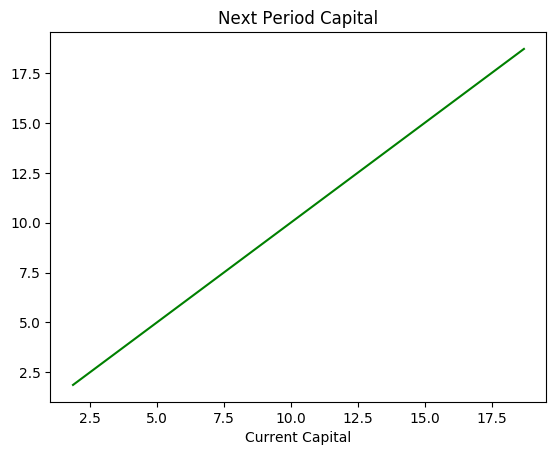

In [21]:
fig = plt.figure("Value function")

plt.plot(df_gdp[:k], df_gdp[Axis{:V}(:k)], color="green", label="Next Period Capital")
plt.xlabel("Current Capital");
plt.title("Next Period Capital");

Now we simulate the model.

In [34]:
mc_ar=model.exogenous
sim_armc = Dolo.simulate(model,dr,mc_ar;N=100)

3-dimensional AxisArray{Float64,3,...} with axes:
    :N, 1:100
    :V, Symbol[:mc_process,:k,:n,:i]
    :T, 1:40
And data, a 100×4×40 Array{Float64,3}:
[:, :, 1] =
 1.0  9.35498  0.328837  0.222272
 1.0  9.35498  0.328837  0.222272
 1.0  9.35498  0.328837  0.222272
 1.0  9.35498  0.328837  0.222272
 1.0  9.35498  0.328837  0.222272
 1.0  9.35498  0.328837  0.222272
 1.0  9.35498  0.328837  0.222272
 1.0  9.35498  0.328837  0.222272
 1.0  9.35498  0.328837  0.222272
 1.0  9.35498  0.328837  0.222272
 1.0  9.35498  0.328837  0.222272
 1.0  9.35498  0.328837  0.222272
 1.0  9.35498  0.328837  0.222272
 ⋮                               
 1.0  9.35498  0.328837  0.222272
 1.0  9.35498  0.328837  0.222272
 1.0  9.35498  0.328837  0.222272
 1.0  9.35498  0.328837  0.222272
 1.0  9.35498  0.328837  0.222272
 1.0  9.35498  0.328837  0.222272
 1.0  9.35498  0.328837  0.222272
 1.0  9.35498  0.328837  0.222272
 1.0  9.35498  0.328837  0.222272
 1.0  9.35498  0.328837  0.222272
 1.0  9.35498  0.32

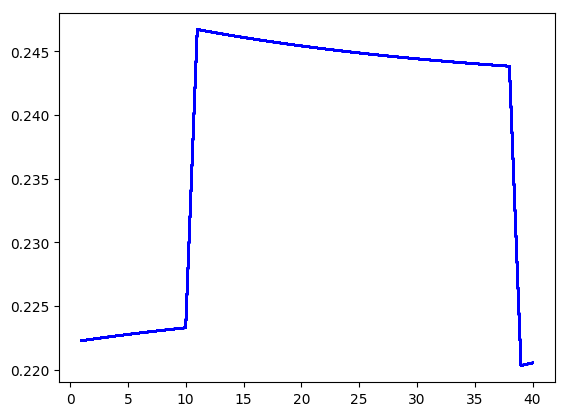

In [64]:
T=40
hor=linspace(1,T,T)
N=100
ii=2
for i in 1:N
   plt.plot(hor, sim_armc[Axis{:N}(ii), Axis{:V}(:i)], color="blue")
end
